In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fueldata = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')

In [3]:
fueldata.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
fueldata.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [5]:
fueldata.nunique()

record_id                       29523
utility_id_ferc1                  185
report_year                        25
plant_name_ferc1                 2315
fuel_type_code_pudl                 6
fuel_unit                           9
fuel_qty_burned                 26432
fuel_mmbtu_per_unit             11222
fuel_cost_per_unit_burned       19416
fuel_cost_per_unit_delivered    16675
fuel_cost_per_mmbtu             12601
dtype: int64

In [6]:
fueldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [7]:
fueldata.isnull()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
29518,False,False,False,False,False,False,False,False,False,False,False
29519,False,False,False,False,False,False,False,False,False,False,False
29520,False,False,False,False,False,False,False,False,False,False,False
29521,False,False,False,False,False,False,False,False,False,False,False


In [8]:
fueldata.groupby('fuel_unit').count()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_unit,,,,,,,,,,
bbl,7998,7998,7998,7998,7998,7998,7998,7998,7998,7998
gal,84,84,84,84,84,84,84,84,84,84
gramsU,464,464,464,464,464,464,464,464,464,464
kgU,110,110,110,110,110,110,110,110,110,110
mcf,11354,11354,11354,11354,11354,11354,11354,11354,11354,11354
mmbtu,180,180,180,180,180,180,180,180,180,180
mwdth,95,95,95,95,95,95,95,95,95,95
mwhth,100,100,100,100,100,100,100,100,100,100
ton,8958,8958,8958,8958,8958,8958,8958,8958,8958,8958


<AxesSubplot:>

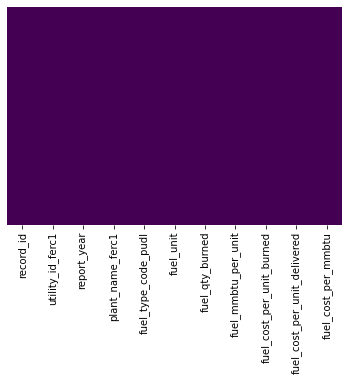

In [9]:
sns.heatmap(fueldata.isnull(), yticklabels =False, cbar=False, cmap='viridis')

In [10]:
fueldata.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [11]:
fueldata['fuel_unit'].unique()

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu',
       'mwhth', 'gal'], dtype=object)

In [12]:
fueldata['fuel_unit']= fueldata['fuel_unit'].fillna(value='mcf')

In [13]:
fueldata.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [14]:
fueldata.isnull().values.any()

False

In [41]:
fueldata.groupby('fuel_type_code_pudl')['fuel_type_code_pudl'].count()

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_type_code_pudl, dtype: int64

<AxesSubplot:xlabel='fuel_type_code_pudl', ylabel='utility_id_ferc1'>

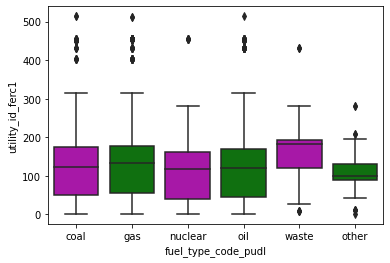

In [25]:
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1",
palette=["m", "g"], data=fueldata)


In [30]:
fueldata.groupby('report_year')['report_year'].count()

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [32]:
fueldata.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11534
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [35]:
fueldata.groupby('fuel_type_code_pudl')['fuel_type_code_pudl'].count()

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_type_code_pudl, dtype: int64

In [29]:
fueldata['record_id'].count()

29523

In [27]:
fueldata['fuel_unit'].unique()

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', 'mwdth', 'mmbtu', 'mwhth',
       'gal'], dtype=object)

In [36]:
fuel_unit = pd.DataFrame ({'Unit':['bbl', 'gal', 'gramsU', 'kgU', 'mcf', 'mmbtu', 'mwdth', 'mwhth',
       'ton'],
                  'Count':[799,84,464,110,11534,180,95,100, 8958]})

<AxesSubplot:xlabel='Unit', ylabel='Count'>

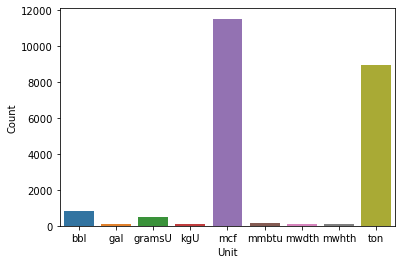

In [37]:
sns.barplot(data=fuel_unit, x= 'Unit', y ='Count')

Text(0.5, 0, 'fuel_unit')

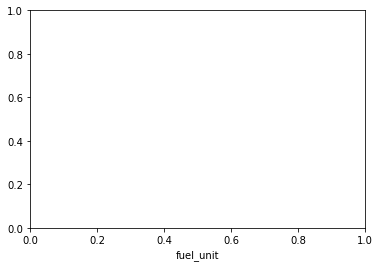

In [38]:
plt.xlabel('fuel_unit')

Text(0.5, 0, 'Fuel Unit')

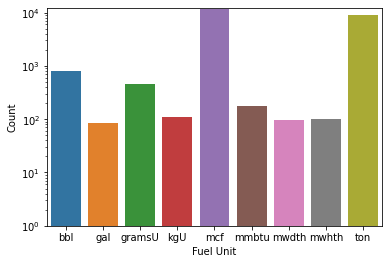

In [40]:
g = sns.barplot(data= fuel_unit , x='Unit', y='Count')
g.set_yscale("log")
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')

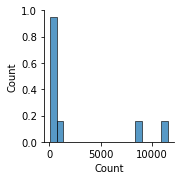

In [42]:
sns.pairplot(fuel_unit)

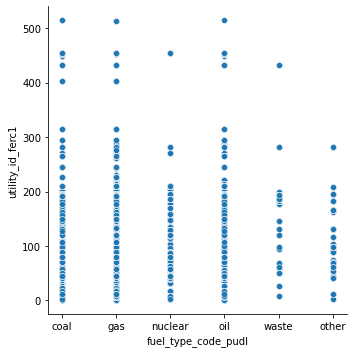

In [44]:
sns.relplot(x='fuel_type_code_pudl', y='utility_id_ferc1', data = fueldata)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='report_year', ylabel='Density'>

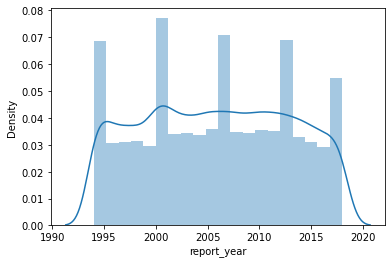

In [48]:
sns.distplot(fueldata ['report_year'], bins = 20)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fuel_qty_burned', ylabel='Density'>

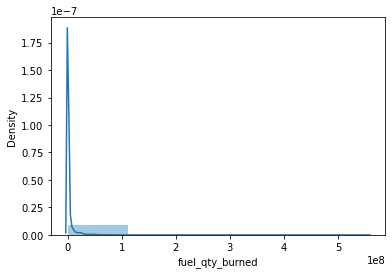

In [50]:
sns.distplot(fueldata ['fuel_qty_burned'], bins = 5)

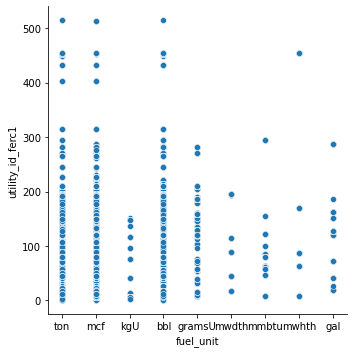

In [51]:
sns.relplot(x='fuel_unit', y='utility_id_ferc1', data = fueldata)

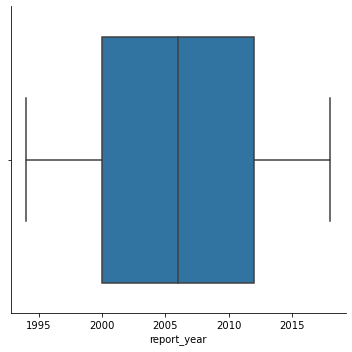

In [54]:
sns.catplot(x='report_year', kind ='box', data = fueldata)

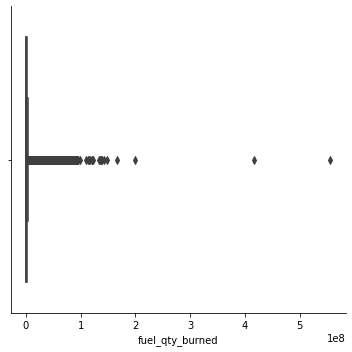

In [55]:
sns.catplot(x='fuel_qty_burned', kind ='box', data = fueldata)

In [56]:
fueldata.nunique()

record_id                       29523
utility_id_ferc1                  185
report_year                        25
plant_name_ferc1                 2315
fuel_type_code_pudl                 6
fuel_unit                           9
fuel_qty_burned                 26432
fuel_mmbtu_per_unit             11222
fuel_cost_per_unit_burned       19416
fuel_cost_per_unit_delivered    16675
fuel_cost_per_mmbtu             12601
dtype: int64

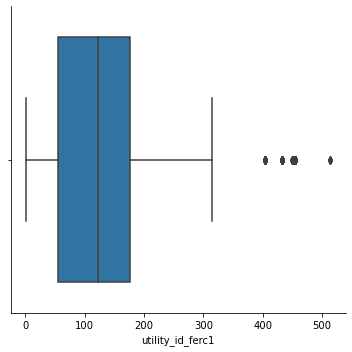

In [57]:
sns.catplot(x='utility_id_ferc1', kind ='box', data = fueldata)

<AxesSubplot:xlabel='count', ylabel='fuel_unit'>

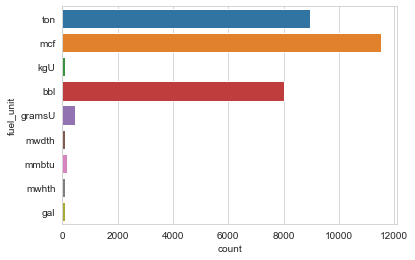

In [62]:
sns.set_style('whitegrid')
sns.countplot(y='fuel_unit', data = fueldata)

<AxesSubplot:xlabel='fuel_type_code_pudl', ylabel='count'>

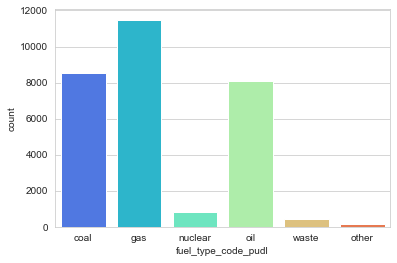

In [69]:
sns.set_style('whitegrid')
sns.countplot(x='fuel_type_code_pudl', palette ='rainbow', data = fueldata)

In [67]:
fueldata['fuel_type_code_pudl'].unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)